loading annotations into memory...
Done (t=0.23s)
creating index...
index created!
There are 51848 images in the training set
There are 17091 annotations in the training set
{'height': 640, 'width': 1024, 'daytime': 'night', 'file_name': '58c58320bc26013700158201.png', 'id': 7018544, 'recordings_id': 36.0, 'timestamp': 5638184624}
File path: /home/test/data/nightowls/nightowls_validation/58c58320bc26013700158201.png
Number of annotations in the image: 1
{'occluded': False, 'difficult': False, 'bbox': [244, 182, 105, 223], 'id': 7006995, 'category_id': 1, 'image_id': 7018544, 'pose_id': 1, 'tracking_id': 7000542, 'ignore': 0, 'area': 23415, 'truncated': False}


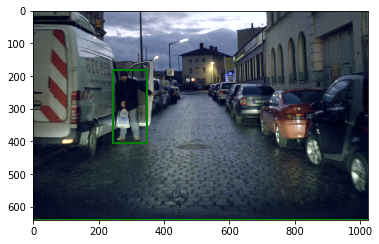

{'height': 640, 'width': 1024, 'daytime': 'night', 'file_name': '58c5812cbc260137e096967a.png', 'id': 7000008, 'recordings_id': None, 'timestamp': 2693435825}
File path: /home/test/data/nightowls/nightowls_validation/58c5812cbc260137e096967a.png
Number of annotations in the image: 2
{'occluded': False, 'difficult': False, 'bbox': [332, 226, 23, 46], 'id': 7000016, 'category_id': 1, 'image_id': 7000008, 'pose_id': 1, 'tracking_id': 7000000, 'ignore': 0, 'area': 1058, 'truncated': False}
{'occluded': False, 'difficult': False, 'bbox': [679, 236, 21, 45], 'id': 7000017, 'category_id': 1, 'image_id': 7000008, 'pose_id': 1, 'tracking_id': 7000001, 'ignore': 0, 'area': 945, 'truncated': False}


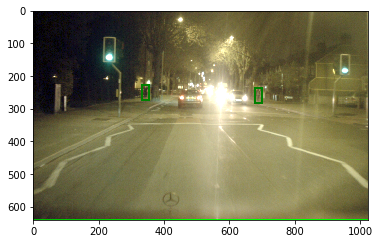

{'height': 640, 'width': 1024, 'daytime': 'night', 'file_name': '58c58329bc2601370015967b.png', 'id': 7023624, 'recordings_id': 36.0, 'timestamp': 5966038898}
File path: /home/test/data/nightowls/nightowls_validation/58c58329bc2601370015967b.png
Number of annotations in the image: 1
{'occluded': False, 'difficult': False, 'bbox': [1012, 182, 40, 123], 'id': 7010006, 'category_id': 4, 'image_id': 7023624, 'pose_id': 1, 'tracking_id': 7000824, 'ignore': 1, 'area': 4920, 'truncated': True}


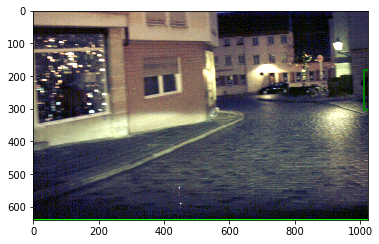

In [2]:
import random
from os import path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from coco import COCO

# path to the ground truth annotation and the data
annFile = '/home/test/data/nightowls/nightowls_validation.json'
image_directory = '/home/test/data/nightowls/nightowls_validation'

# load the annotations and the list of images
cocoGt = COCO(annFile)
imgIds = sorted(cocoGt.getImgIds())
print('There are %d images in the training set' % len(imgIds))
annotations = cocoGt.getAnnIds()
print('There are %d annotations in the training set' % len(annotations))

for i in range(20):
    
    # get a random image and its path
    im_id = imgIds[random.randint(0, len(imgIds))]
    image = cocoGt.loadImgs(ids=im_id)[0]
    file_path = path.join(image_directory, image['file_name'])
    

    # get the annotations of the images
    anns = cocoGt.getAnnIds([image['id']])
    
    
    if(len(anns) <1):
        continue
    
    print(image)
    print('File path: ' + str(file_path))
    print('Number of annotations in the image: ' + str(len(anns)))

    # draw the annotations on the image
    img=mpimg.imread(file_path)
    fig,ax = plt.subplots(1)
    ax.imshow(img)

    for ann_id in anns:
        ann = cocoGt.loadAnns(ids=ann_id)[0]
        print(ann)
        bbox = ann['bbox']
        rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='g',facecolor='none')
        ax.add_patch(rect)

    #print
    plt.show()

